# Homework 6
## 1. Warmup: constructing pandas objects
### 1.1

In [110]:
import pandas as pd
import numpy as np
primes = [2,3,5,7,11,13,17,19,23,29]
idx = "a b c d e f g h i j".split()
alphaprimes = pd.Series(primes, index=idx)
alphaprimes

a     2
b     3
c     5
d     7
e    11
f    13
g    17
h    19
i    23
j    29
dtype: int64

### 1.2

In [111]:
animal = ['goat']*4+['bird']*4 + ['llama']*4
parent1 = (['A']*2+['a']*2)*3
parent2 = ['A','a']*6
tuples = list(zip(*[animal,parent1,parent2]))
index = pd.MultiIndex.from_tuples(tuples,names = ['animal','parent1','parent2'])

score1 = list(range(1,13))
score2 = [2,4,4,6,6,8,8,10,10,12,12,14]
arr = np.transpose(np.array([score1,score2]))

animals = pd.DataFrame(arr,index = index, columns=['score1','score2'])
animals

score1  score2
animal parent1 parent2                
goat   A       A             1       2
               a             2       4
       a       A             3       4
               a             4       6
bird   A       A             5       6
               a             6       8
       a       A             7       8
               a             8      10
llama  A       A             9      10
               a            10      12
       a       A            11      12
               a            12      14

## 2. Working with pandas Dataframes
### 2.1

In [112]:
iris = pd.read_csv("iris.csv")
print(iris.info())
iris['Species'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None


array(['setosa', 'versicolor', 'virginica'], dtype=object)

There are 150 data points. There are 5 columns. The column names and corresponding data-types are: (Sepal.Length, float64), (Sepal.Width, float64), (Petal.Length, float64), (Petal.Width, float64) and (Species, object). There are 3 types of species of flower: setosa, versicolor, and virginica.

### 2.2

In [113]:
print(iris.iloc[34])
print("\n\n")
print(iris.iloc[37])

iris.iloc[34,3] = 0.2
iris.iloc[37,1] = 3.6
iris.iloc[37,2] = 1.4


print("\n\n")
print(iris.iloc[34])
print("\n\n")
print(iris.iloc[37])

Sepal.Length       4.9
Sepal.Width        3.1
Petal.Length       1.5
Petal.Width        0.1
Species         setosa
Name: 34, dtype: object



Sepal.Length       4.9
Sepal.Width        3.1
Petal.Length       1.5
Petal.Width        0.1
Species         setosa
Name: 37, dtype: object



Sepal.Length       4.9
Sepal.Width        3.1
Petal.Length       1.5
Petal.Width        0.2
Species         setosa
Name: 34, dtype: object



Sepal.Length       4.9
Sepal.Width        3.6
Petal.Length       1.4
Petal.Width        0.1
Species         setosa
Name: 37, dtype: object


### 2.3

In [114]:
iris['Petal.Ratio'] = iris['Petal.Length']/iris['Petal.Width']
iris['Sepal.Ratio'] = iris['Sepal.Length']/iris['Sepal.Width']

### 2.4

In [115]:
iris.to_csv('iris_corrected.csv')

### 2.5

In [116]:
iris[['Species','Petal.Ratio','Sepal.Ratio']].groupby("Species").agg(['mean','median','min','max','std'])

Petal.Ratio                                     Sepal.Ratio  \
                  mean    median       min   max       std        mean   
Species                                                                  
setosa        6.908000  7.000000  2.666667  15.0  2.854545    1.470188   
versicolor    3.242837  3.240385  2.666667   4.1  0.312456    2.160402   
virginica     2.780662  2.666667  2.125000   4.0  0.407367    2.230453   

                                                    
              median       min       max       std  
Species                                             
setosa      1.463063  1.268293  1.956522  0.118750  
versicolor  2.161290  1.764706  2.818182  0.228658  
virginica   2.169540  1.823529  2.961538  0.246992

## 3. Plotting Dataframes: Major League Baseball
### 3.1

In [117]:
mlb_df = pd.read_csv('GL2018.TXT')
mlb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Columns: 161 entries, 20180329 to Y
dtypes: float64(2), int64(83), object(76)
memory usage: 3.0+ MB


In [118]:
mlb_df.head()

,20180329,0,Thu,COL,NL,1,ARI,NL.1,1.1,2,...,Nick Ahmed,6.3,dysoj001,Jarrod Dyson,9.2,corbp001.2,Patrick Corbin.2,1.6,Unnamed: 159,Y
0,20180329,0,Thu,PHI,NL,1,ATL,NL,1,5,...,Dansby Swanson,6,flahr001,Ryan Flaherty,5,tehej001,Julio Teheran,1,NaN,Y
1,20180329,0,Thu,SFN,NL,1,LAN,NL,1,1,...,Yasmani Grandal,2,forsl001,Logan Forsythe,5,kersc001,Clayton Kershaw,1,NaN,Y
2,20180329,0,Thu,CHN,NL,1,MIA,NL,1,8,...,Miguel Rojas,6,wallc001,Chad Wallach,2,urenj001,Jose Urena,1,NaN,Y
3,20180329,0,Thu,SLN,NL,1,NYN,NL,1,4,...,Kevin Plawecki,2,syndn001,Noah Syndergaard,1,rosaa003,Amed Rosario,6,NaN,Y
4,20180329,0,Thu,MIL,NL,1,SDN,NL,1,2,...,Freddy Galvis,6,hedga001,Austin Hedges,2,richc002,Clayton Richard,1,NaN,Y


In [119]:
mlb_df.iloc[:,[4,7,9,10]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 4 columns):
NL      2430 non-null object
NL.1    2430 non-null object
2       2430 non-null int64
8       2430 non-null int64
dtypes: int64(2), object(2)
memory usage: 76.0+ KB


In [120]:
mlb_df = mlb_df.rename(columns={'NL':'v_league','NL.1':'h_league','2':'v_score','8':'h_score'})

### 3.2

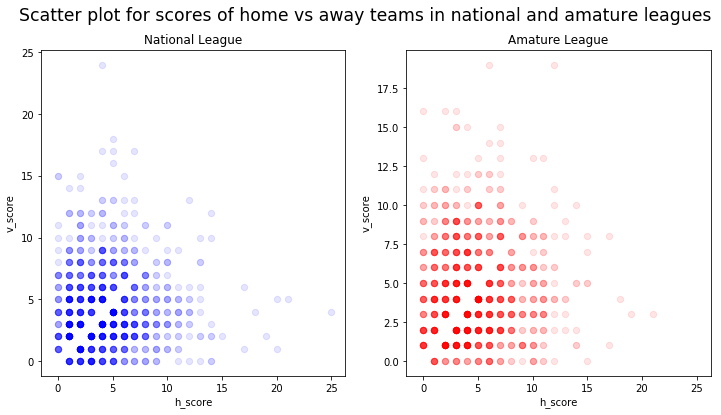

In [121]:
from matplotlib import pyplot as plt
mlb_df_NL = mlb_df.groupby(['v_league','h_league']).get_group(('NL','NL'))
mlb_df_AL = mlb_df.groupby(['v_league','h_league']).get_group(('AL','AL'))


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharex=True)
ax = axs[0]

ax.scatter(mlb_df_NL['h_score'],mlb_df_NL['v_score'],s = 40, alpha = 0.1, c = 'b') 
ax.set_title('National League')
ax.set_ylabel('v_score')
ax.set_xlabel('h_score')

ax = axs[1]
ax.scatter(mlb_df_AL['h_score'],mlb_df_AL['v_score'],s = 40, alpha = 0.1, c = 'r')
ax.set_title('Amature League')
ax.set_ylabel('v_score')
ax.set_xlabel('h_score')


fig.suptitle('Scatter plot for scores of home vs away teams in national and amature leagues', fontsize = 'xx-large')
fig.savefig('home_vs_away_scores.pdf')
plt.show()


### 3.3

Text(0,0.5,'frequency')

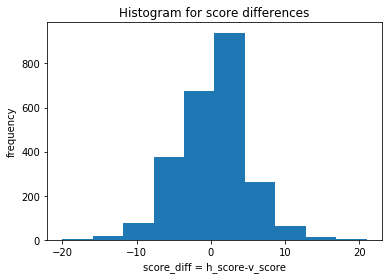

In [122]:
mlb_df['score_diff'] = mlb_df['h_score']-mlb_df['v_score']
plt.hist(mlb_df['score_diff'])
plt.title('Histogram for score differences')
plt.xlabel("score_diff = h_score-v_score")
plt.ylabel('frequency')

### 3.4

In [123]:
lambda_home = np.mean(mlb_df['h_score'])
lambda_visitor = np.mean(mlb_df['v_score'])
print(lambda_home)
print(lambda_visitor)

4.524279835390947
4.37283950617284


### 3.5

In [124]:
from scipy import stats as st
rv = st.skellam(lambda_home,lambda_visitor)
prob = rv.pmf(list(range(-30,0))+list(range(1,31)))
prob = prob/np.sum(prob)
score_diff = mlb_df['h_score']-mlb_df['v_score']
n = len(score_diff)
freq_series = score_diff.value_counts()
a = freq_series.keys()
freq_list = np.array([0]*60)
for c in a:
    if c<0:
        freq_list[c+30] = freq_series[c]
    else:
        if c>0:
            freq_list[c+29] = freq_series[c]
exp_freq = n*np.array(prob)
chi2stat, chi2pvalue = st.chisquare(freq_list, exp_freq)

In [125]:
print(chi2stat)
print(chi2pvalue)

1395521.94771
0.0


From the calculated p-value, we say that there is enough evidence in the data to conclude that the model doesn't fit for this data, at a level of significance 0.05.

From the histogram for the score differences we see that most of the score differences are in the range $[-12,12]$. We do the $\chi^2$-test for the classes $K_H-K_V \in \{-12, -11, \ldots, -1,1,\ldots, 12, \text{others}\},$ where "$K_H-K_V = \text{others}$" means $|K_H-K_V|>12.$ We calculate the corresponding expected frequencies and observed frequencies for each class and use that to do the $\chi^2$-test. This should give us an improved scheme of testing